# MUSIC RECOMMENDATION SYSTEM

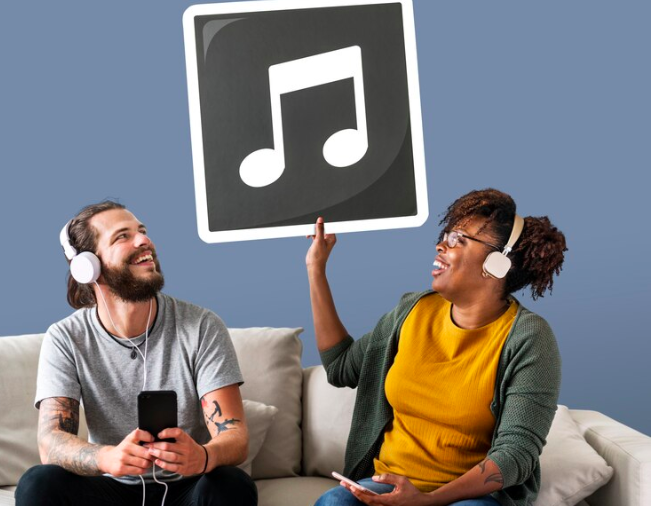


### Import pandas and other necessary libraries

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pickle

### Load and explore the dataset 

In [53]:

# Load the dataset
music_df = pd.read_csv('music.csv')

# Display the first few rows of the dataset
music_df.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [22]:
# Dataset summary
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     18 non-null     int64
 1   gender  18 non-null     int64
 2   genre   18 non-null     int64
dtypes: int64(3)
memory usage: 560.0 bytes


The dataset contains three columns which consist of age, gender, and genre as well as 18 entries. The gender column which supposed to be a string is already encoded into 1 and 0, with 1 representing male and 0 representing female.

### Data Cleaning

In [27]:
# Check for missing values and duplicates
missing_values = music_df.isnull().sum()
duplicates = music_df.duplicated().sum()

missing_values, duplicates

(age       0
 gender    0
 genre     0
 dtype: int64,
 0)

The dataset has no missing values or duplicates, so no cleaning is required in these areas.

### Data Preparation

In [54]:
# # Encode the genre column (target to numeric values for modeling
# label_encoder = LabelEncoder()
# music_df['genre'] = label_encoder.fit_transform(music_df['genre'])

In [64]:

# Define features (X) and label (y)
X = music_df[['age', 'gender']]
y = music_df['genre']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building using Decision Tree Classifier

In [66]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Make predictions

In [67]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

print('Accuracy:', y_pred)

Accuracy: ['HipHop' 'HipHop' 'Classical' 'Jazz']


### Evaluating the Model Accuracy

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Model Accuracy: 100.00%


The model achieve an accuracy of 100% after training. This means that it is able to predict the genre accurately with 100% certainty

### Save the trained model for deployment purposes

In [69]:

# Save the model
with open('music_model.pkl', 'wb') as model_file:
    pickle.dump(dt_model, model_file)
